In [1]:
# Import Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

charity_df = pd.read_csv('Resources/charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# List out count per APPLICATION_TYPE
app_count = charity_df.APPLICATION_TYPE.value_counts()
app_count

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

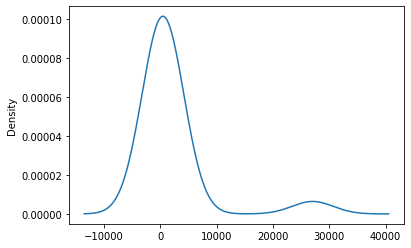

In [3]:
# Create a plot to see the density of the app_count
app_plt = app_count.plot.density()
app_plt

In [4]:
# Merge the smaller, unique data rows into an Other row
replace_app = list(app_count[app_count < 1000].index)
for app in replace_app:
    charity_df.APPLICATION_TYPE = charity_df.APPLICATION_TYPE.replace(app,'Other')
charity_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# List count for CLASSIFICATION
class_count = charity_df.CLASSIFICATION.value_counts()
class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1570        1
C6100        1
C1236        1
C8210        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

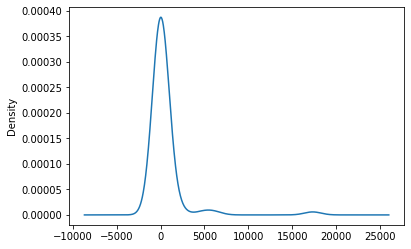

In [6]:
# Create a plot for class_count
class_plt = class_count.plot.density()
class_plt

In [7]:
# Replace the rows with less than 1000 values and merge into an "Other" row
replace_class = list(class_count[class_count < 1000].index)
for classification in replace_class:
    charity_df.CLASSIFICATION = charity_df.CLASSIFICATION.replace(classification,'Other')
charity_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [8]:
# Count Unique values per each column
charity_int = charity_df.dtypes[charity_df.dtypes != 'object'].index.tolist()
charity_df[charity_int].nunique()

EIN              34299
STATUS               2
ASK_AMT           8747
IS_SUCCESSFUL        2
dtype: int64

In [9]:
# List count for ASK_AMT values
ask_count = charity_df.ASK_AMT.value_counts()
ask_count

5000       25398
10478          3
15583          3
6725           3
63981          3
           ...  
772556         1
70103          1
27096          1
25049          1
1138700        1
Name: ASK_AMT, Length: 8747, dtype: int64

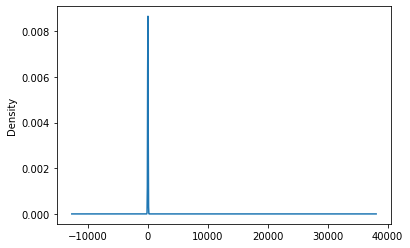

In [10]:
# Plot out ask_count
ask_plt = ask_count.plot.density()
ask_plt

In [11]:
# Created bins to group the ask amounts
size_bins=[0,10000,20000,30000,40000,50000,60000,70000,
           80000,90000,100000,500000,1000000,5000000,10000000,
           100000000,10000000000
          ]
group_names=["5000-10000","10001-20000",'20001-30000',
             '30001-40000','40001-50000','50001-60000',
             '60001-70000','70001-80000','80001-90000',
             '90001-100000','100001-500000','500001-1000000',
             '1000001-5000000','5000001-10000000','10000001-100000000',
             '100000001+'
            ]
charity_df["ASK_AMT"]=pd.cut(charity_df["ASK_AMT"],size_bins,labels=group_names)
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,Other,Independent,C1000,ProductDev,Association,1,0,N,5000-10000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,100001-500000,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000-10000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,5000-10000,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,100001-500000,1


In [12]:
# Set tje values as object
charity_df = charity_df.astype({'ASK_AMT':'object'})

In [13]:
# Check the datatypes in the dataframe
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                   object
IS_SUCCESSFUL              int64
dtype: object

In [14]:
# Drop data values that are not needed in the machine learning model
charity_df = charity_df.drop(columns=['NAME','EIN'])

In [15]:
# Set all datatypes to object
charity_cat = charity_df.dtypes[charity_df.dtypes == 'object'].index.tolist()
charity_df[charity_cat].nunique()

APPLICATION_TYPE           6
AFFILIATION                6
CLASSIFICATION             6
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
ASK_AMT                   16
dtype: int64

In [16]:
# Check datatypes
charity_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                   object
IS_SUCCESSFUL              int64
dtype: object

In [17]:
# Encode the dataframe
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(charity_df[charity_cat]))
encode_df.columns = enc.get_feature_names(charity_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,ASK_AMT_30001-40000,ASK_AMT_40001-50000,ASK_AMT_5000-10000,ASK_AMT_5000001-10000000,ASK_AMT_500001-1000000,ASK_AMT_50001-60000,ASK_AMT_60001-70000,ASK_AMT_70001-80000,ASK_AMT_80001-90000,ASK_AMT_90001-100000
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Modify encoded data
charity_df = charity_df.merge(encode_df, left_index=True, right_index=True)
charity_df = charity_df.drop(charity_cat,1)
charity_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,ASK_AMT_30001-40000,ASK_AMT_40001-50000,ASK_AMT_5000-10000,ASK_AMT_5000001-10000000,ASK_AMT_500001-1000000,ASK_AMT_50001-60000,ASK_AMT_60001-70000,ASK_AMT_70001-80000,ASK_AMT_80001-90000,ASK_AMT_90001-100000
0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Split the dataframe into train and test models
y = charity_df.IS_SUCCESSFUL.values
X = charity_df.drop(columns='IS_SUCCESSFUL').values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   random_state=42,
                                                   stratify=y)

In [20]:
# Scale the X_train
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# Find the Logistic Regression Model Accuracy
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)
log_classifier.fit(X_train,y_train)
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.716


In [22]:
# Find SVM Model Accuracy
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test_scaled)
print(f' SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}')

 SVM model accuracy: 0.703


In [43]:
# Find the Random Forest Predictive Accuracy
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.717


In [34]:
# USe Keras to set up a neural network
number_input_features = len(X_train_scaled[0])
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, 
                                   activation="relu", 
                                   input_dim=number_input_features))
nn_model.add(tf.keras.layers.Dense(units=1, 
                                   activation="sigmoid"))
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile the neural network
nn_model.compile(loss="binary_crossentropy", 
                 optimizer="adam", 
                 metrics=["accuracy"])

In [36]:
# Run the neural network model
fit_model = nn_model.fit(X_train_scaled, 
                         y_train, 
                         epochs=100)

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 6s 216us/sample - loss: 0.6029 - accuracy: 0.6981
Epoch 2/100
25724/25724 [==============================] - 2s 94us/sample - loss: 0.5689 - accuracy: 0.7254
Epoch 3/100
25724/25724 [==============================] - 2s 96us/sample - loss: 0.5622 - accuracy: 0.7273s - l
Epoch 4/100
25724/25724 [==============================] - 3s 97us/sample - loss: 0.5584 - accuracy: 0.7305
Epoch 5/100
25724/25724 [==============================] - 2s 96us/sample - loss: 0.5563 - accuracy: 0.7310
Epoch 6/100
25724/25724 [==============================] - 2s 95us/sample - loss: 0.5543 - accuracy: 0.7309
Epoch 7/100
25724/25724 [==============================] - 2s 96us/sample - loss: 0.5538 - accuracy: 0.7328
Epoch 8/100
25724/25724 [==============================] - 2s 96us/sample - loss: 0.5528 - accuracy: 0.7324
Epoch 9/100
25724/25724 [==============================] - 3s 98us/sample - loss: 0.5519 - accuracy: 0.7320

25724/25724 [==============================] - 2s 93us/sample - loss: 0.5410 - accuracy: 0.7384
Epoch 76/100
25724/25724 [==============================] - 2s 92us/sample - loss: 0.5407 - accuracy: 0.7386
Epoch 77/100
25724/25724 [==============================] - 3s 101us/sample - loss: 0.5411 - accuracy: 0.7385
Epoch 78/100
25724/25724 [==============================] - 3s 129us/sample - loss: 0.5405 - accuracy: 0.7391
Epoch 79/100
25724/25724 [==============================] - 3s 105us/sample - loss: 0.5410 - accuracy: 0.7379
Epoch 80/100
25724/25724 [==============================] - 3s 99us/sample - loss: 0.5406 - accuracy: 0.7392
Epoch 81/100
25724/25724 [==============================] - 2s 94us/sample - loss: 0.5406 - accuracy: 0.7399
Epoch 82/100
25724/25724 [==============================] - 2s 93us/sample - loss: 0.5407 - accuracy: 0.7390
Epoch 83/100
25724/25724 [==============================] - 2s 92us/sample - loss: 0.5410 - accuracy: 0.7392
Epoch 84/100
25724/25724 [===

In [37]:
# Print the model_loss and model accuracy
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,
                                               y_test,
                                               verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/1 - 1s - loss: 0.6233 - accuracy: 0.7194
Loss: 0.5678191558682189, Accuracy: 0.7194169163703918


In [46]:
# Modify the layers to get a better accuracy score
number_input_features = len(X_train_scaled[0])
hn_layer1 = 200
hn_layer2 = 100

nns = tf.keras.models.Sequential()
nns.add(
    tf.keras.layers.Dense(units=hn_layer1, 
                          input_dim=number_input_features,
                          activation='relu')
)
nns.add(
    tf.keras.layers.Dense(units=hn_layer2,
                          activation='relu')
)

nns.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
nns.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 200)               11200     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 31,401
Trainable params: 31,401
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compile the model
nns.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
# Run the model
fit_model = nns.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 6s 228us/sample - loss: 0.5730 - accuracy: 0.7201
Epoch 2/50
25724/25724 [==============================] - 4s 155us/sample - loss: 0.5561 - accuracy: 0.7299
Epoch 3/50
25724/25724 [==============================] - 4s 156us/sample - loss: 0.5523 - accuracy: 0.7321
Epoch 4/50
25724/25724 [==============================] - 4s 143us/sample - loss: 0.5497 - accuracy: 0.7335
Epoch 5/50
25724/25724 [==============================] - 4s 156us/sample - loss: 0.5481 - accuracy: 0.7349
Epoch 6/50
25724/25724 [==============================] - 5s 189us/sample - loss: 0.5462 - accuracy: 0.7358
Epoch 7/50
25724/25724 [==============================] - 4s 166us/sample - loss: 0.5454 - accuracy: 0.7363
Epoch 8/50
25724/25724 [==============================] - 4s 173us/sample - loss: 0.5438 - accuracy: 0.7379
Epoch 9/50
25724/25724 [==============================] - 3s 126us/sample - loss: 0.5429 - accuracy: 0.7380
Epoch

In [49]:
# Print out accuracy score
model_loss, model_accuracy = nns.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

8575/1 - 1s - loss: 0.6407 - accuracy: 0.7206
Loss: 0.5974126807732763, Accuracy: 0.7205830812454224


In [39]:
# Add more layers to improve the accuracy score
number_input_features = len(X_train_scaled[0])
hn_layer1 = 250
hn_layer2 = 100
hn_layer3 = 50
hn_layer4 = 20
nn = tf.keras.models.Sequential()
nn.add(
    tf.keras.layers.Dense(units=hn_layer1, 
                          input_dim=number_input_features,
                          activation='relu')
)
nn.add(
    tf.keras.layers.Dense(units=hn_layer2,
                          activation='relu')
)
nn.add(
    tf.keras.layers.Dense(units=hn_layer3,
                          activation='relu')
)
nn.add(
    tf.keras.layers.Dense(units=hn_layer4,
                          activation='relu')
)
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 250)               14000     
_________________________________________________________________
dense_9 (Dense)              (None, 100)               25100     
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 21        
Total params: 45,191
Trainable params: 45,191
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
# Run the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50)

Train on 25724 samples
Epoch 1/50
25724/25724 [==============================] - 7s 285us/sample - loss: 0.5712 - accuracy: 0.7201
Epoch 2/50
25724/25724 [==============================] - 5s 178us/sample - loss: 0.5570 - accuracy: 0.7303
Epoch 3/50
25724/25724 [==============================] - 5s 209us/sample - loss: 0.5521 - accuracy: 0.7324
Epoch 4/50
25724/25724 [==============================] - 6s 222us/sample - loss: 0.5506 - accuracy: 0.7328
Epoch 5/50
25724/25724 [==============================] - 6s 241us/sample - loss: 0.5483 - accuracy: 0.7328
Epoch 6/50
25724/25724 [==============================] - 5s 185us/sample - loss: 0.5469 - accuracy: 0.7343
Epoch 7/50
25724/25724 [==============================] - 5s 183us/sample - loss: 0.5455 - accuracy: 0.7368
Epoch 8/50
25724/25724 [==============================] - 6s 236us/sample - loss: 0.5445 - accuracy: 0.7371
Epoch 9/50
25724/25724 [==============================] - 5s 182us/sample - loss: 0.5427 - accuracy: 0.7370
Epoch

In [42]:
# Print out the accuracy score
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

8575/1 - 1s - loss: 0.7266 - accuracy: 0.7188
Loss: 0.6378773621706504, Accuracy: 0.7188338041305542
